In [1]:
import numpy as np

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 6.1 매개변수 갱신

## 6.1.2 확률적 경사 하강법(SGD)

In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.key():
            params[key] -= self.lr * grads[key]


In [ ]:
network = TwoLayerNet(...)
optimizer = SGD()

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ...

## 6.1.4 모멘텀

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

## 6.1.5 AdaGrad

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


## 6.1.7 어느 갱신 방법을 이용할 것인가?

<AxesSubplot:>

(-10.0, 10.0)

(-10.0, 10.0)

Text(0.5, 1.0, 'SGD')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

<AxesSubplot:>

(-10.0, 10.0)

(-10.0, 10.0)

Text(0.5, 1.0, 'Momentum')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

<AxesSubplot:>

(-10.0, 10.0)

(-10.0, 10.0)

Text(0.5, 1.0, 'AdaGrad')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

<AxesSubplot:>

(-10.0, 10.0)

(-10.0, 10.0)

Text(0.5, 1.0, 'Adam')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

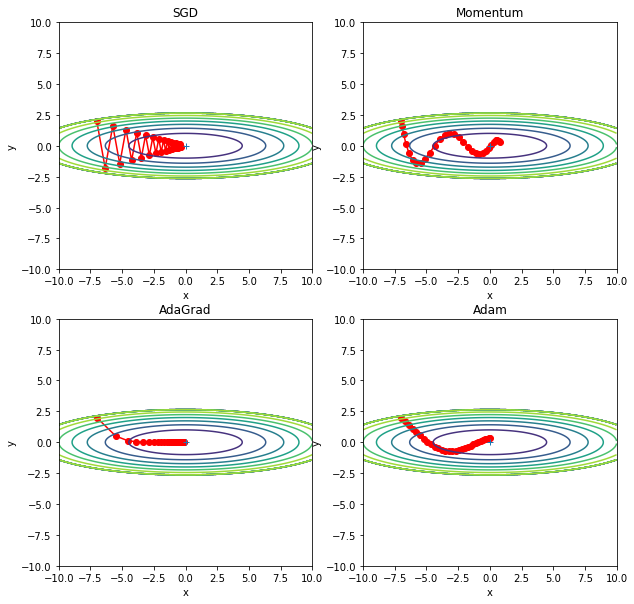

In [15]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.rcParams['figure.figsize'] = (10,10)
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

## 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

===========iteration:0===========
SGD:2.380405805885018
Momentum:2.3368566350310553
AdaGrad:2.0529607513119488
Adam:2.219890566187893
===========iteration:100===========
SGD:1.409670667218519
Momentum:0.3759239625007271
AdaGrad:0.1416637080972356
Adam:0.3358866559141278
===========iteration:200===========
SGD:0.7385900106668122
Momentum:0.18333826080905816
AdaGrad:0.09784896184570563
Adam:0.16101285600127077
===========iteration:300===========
SGD:0.43190206097695455
Momentum:0.14654833675258386
AdaGrad:0.08562819089124085
Adam:0.1474667122998059
===========iteration:400===========
SGD:0.4351126736177843
Momentum:0.20909587003969837
AdaGrad:0.11067310786762105
Adam:0.1633888645578068
===========iteration:500===========
SGD:0.4154295840487318
Momentum:0.22625450871077765
AdaGrad:0.159994433487321
Adam:0.20302367574833324
===========iteration:600===========
SGD:0.40246821159830376
Momentum:0.15627273832659397
AdaGrad:0.05751476422294232
Adam:0.0732470360443861
===========iteration:700===

<Figure size 1000x800 with 0 Axes>

Text(0.5, 0, 'iterations')

Text(0, 0.5, 'loss')

(0.0, 1.0)

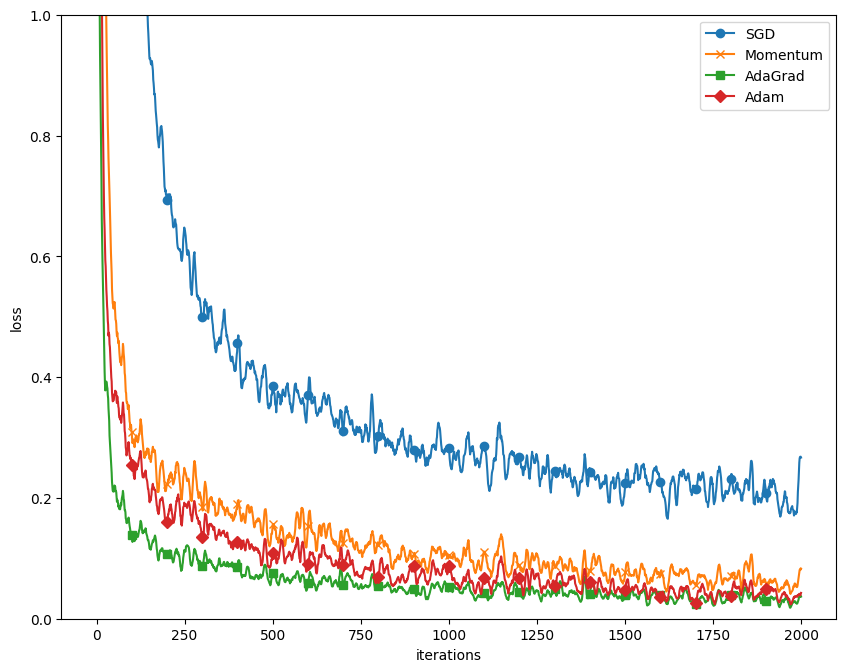

In [4]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
plt.figure(figsize=(10,8), dpi=100)
# plt.rcParams['figure.figsize'] = (10,10)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 6.2.2 은닉층의 활성화값 분포

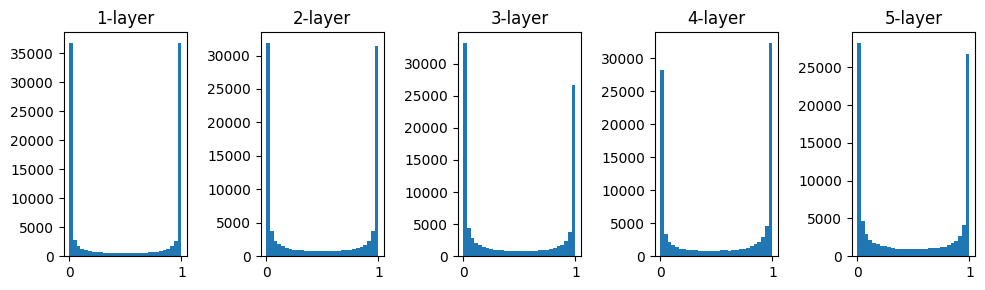

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    # 가중치를 표준편차가 1인 정규분포로 초기화
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

# 히스토그램 그리기
_ = plt.figure(figsize=(10,3), dpi=100)
for i, a in activations.items():
    _ = plt.subplot(1, len(activations), i+1)
    _ = plt.title(str(i+1) + '-layer')
    _ = plt.hist(a.flatten(), 30, range=(0,1))

plt.tight_layout()
plt.show()

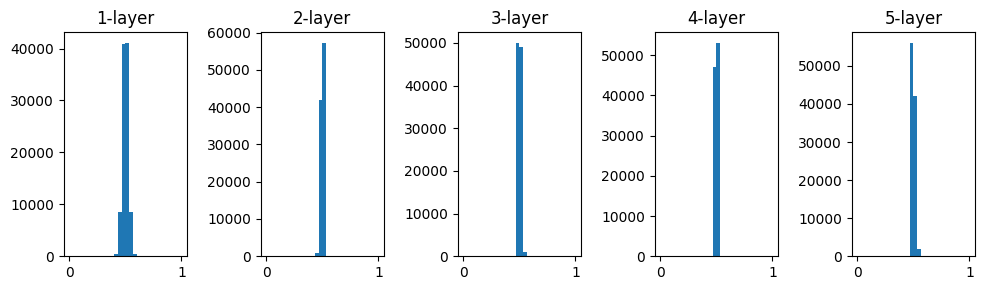

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    # 가중치를 표준편차가 1인 정규분포로 초기화
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

# 히스토그램 그리기
_ = plt.figure(figsize=(10,3), dpi=100)
for i, a in activations.items():
    _ = plt.subplot(1, len(activations), i+1)
    _ = plt.title(str(i+1) + '-layer')
    _ = plt.hist(a.flatten(), 30, range=(0,1))

plt.tight_layout()
plt.show()